In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rarity_score as r
import seaborn as sns

% matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Set parameters

In [2]:
FTISO_PATH = '../data/input/ftiso.csv'
BEERS_PATH = '../data/input/beers.csv'
BREWERIES_PATH = '../data/input/breweries.csv'
DISTRIBUTION_PATH = '../data/input/beer_distribution.csv'
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.1,
    'geo_score': 0.05,
    'production_score': 0.05
    }

### Components with feature scaling

In [74]:
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.feature_scale)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.feature_scale)
breweries = r.production_scores(BREWERIES_PATH, r.feature_scale)
beers = r.untappd_scores(BEERS_PATH, r.feature_scale)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)


dropped -27054 na rows
dropped -2461 zero rows
4205 rows remain


iso/ft ratio score


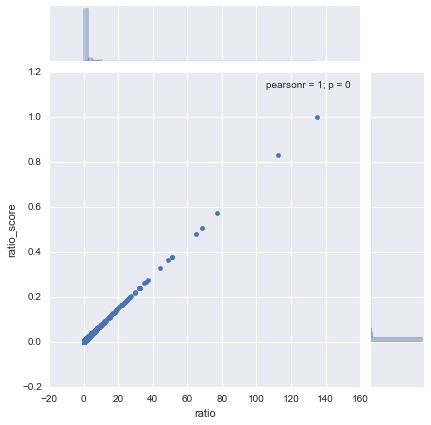


iso count score


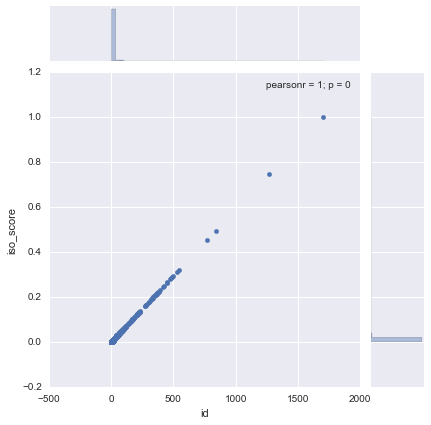


untappd score


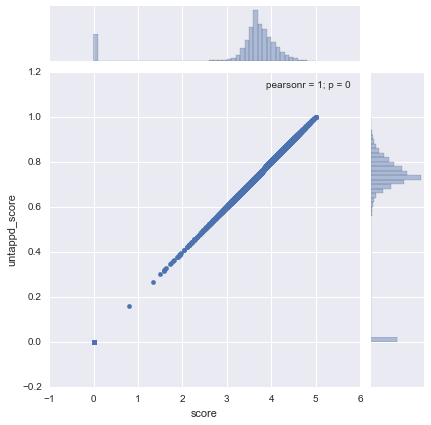


geo score


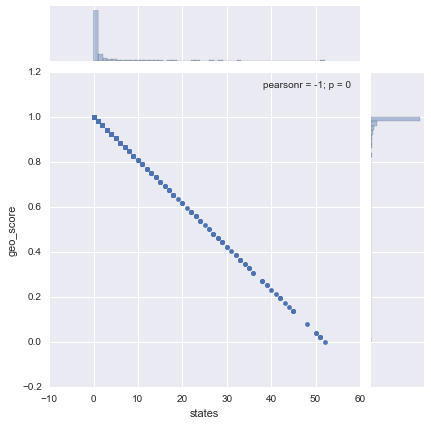


production score


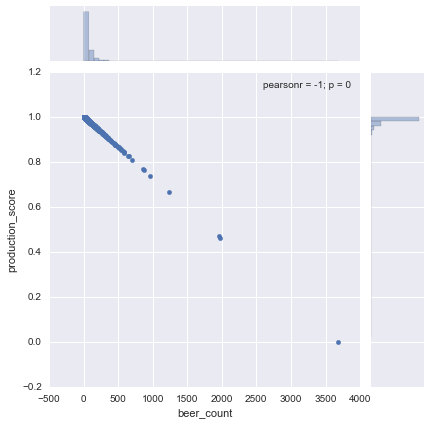

In [75]:
print 'iso/ft ratio score'
sns.jointplot(x='ratio', y='ratio_score', data=ft)
plt.show()
print

print 'iso count score'
sns.jointplot(x='id', y='iso_score', data=iso)
plt.show()
print

print 'untappd score'
sns.jointplot(x='score', y='untappd_score', data=beers)
plt.show()
print 

print 'geo score'
sns.jointplot(x='states', y='geo_score', data=distribution)
plt.show()
print 

print 'production score'
sns.jointplot(x='beer_count', y='production_score', data=breweries)
plt.show()
print 

In [76]:
print 'top 10 using score'
agg_rarity.sort('score', ascending=False).head(10)

top 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
9330,Kentucky Brunch,131332,7532,0.831474,0.263065,0.901354,0.961538,0.981774,0.625117
12439,Susan,262980,2562,1.000000,0.078685,0.875660,0.980769,0.969260,0.616541
867,Heady Topper,4691,1244,0.021353,1.000000,0.932816,0.961538,0.989119,0.599356
4703,Pliny the Younger,28331,5143,0.506461,0.320611,0.937942,0.826923,0.983134,0.515126
812,Pliny The Elder,4499,5143,0.014212,0.743981,0.914722,0.826923,0.983134,0.485252
4529,Double Sunshine,26308,3758,0.362936,0.287140,0.915560,0.961538,0.976333,0.448480
7187,Mornin' Delight,72430,7532,0.376693,0.208456,0.906248,0.961538,0.981774,0.421850
1243,Canadian Breakfast Stout (CBS),5755,549,0.479978,0.189665,0.925478,0.326923,0.840588,0.418781
7483,Hunahpu’s Imperial Stout - Bourbon Barrel Aged,79177,379,0.570352,0.044627,0.810844,0.865385,0.663221,0.403506
4487,Abner,25843,2562,0.240994,0.247798,0.905454,0.980769,0.969260,0.383564


In [77]:
print 'tail 10 using score'
agg_rarity.sort('score', ascending=False).tail(10)

tail 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
33412,Xocoveza Charred,1177453,1204,0.008925,0.012918,0,0.211538,0.767682,0.057699
33303,Xocoveza Extra Añejo,1165316,1204,0.007777,0.010570,0,0.211538,0.767682,0.056300
27310,Game of Thrones - Three Eyed Raven,867605,249,0.000589,0.001762,0,0.134615,0.962187,0.055780
28734,Enjoy After 12.26.15,916696,1204,0.000827,0.009395,0,0.211538,0.767682,0.053050
29676,Old Stock Ale (2015),958334,919,0.002075,0.000587,0,0.038462,0.975245,0.051750
30653,2015 Chai Spiced Imperial Russian Stout,998460,1204,0.000724,0.002936,0,0.211538,0.767682,0.050425
30786,Enjoy After 03.14.16 Brett IPA,1004699,1204,0.002921,0.000587,0,0.211538,0.767682,0.050364
31171,Fyodor's Classic (2014 Stone Imperial Russian ...,1023207,1204,0.000597,0.002349,0,0.211538,0.767682,0.050139
32741,Enjoy After 07.04.16 Brett IPA,1116010,1204,0.000632,0.001762,0,0.211538,0.767682,0.049918
32510,Stone Enjoy By 07.04.15 IPA,1096875,1204,0.000884,0.000587,0,0.211538,0.767682,0.049550


### Components using weighted percentiles

In [78]:
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.weighted_percentile)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.weighted_percentile)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)


dropped -27054 na rows
dropped 0 zero rows
6666 rows remain


iso/ft ratio score


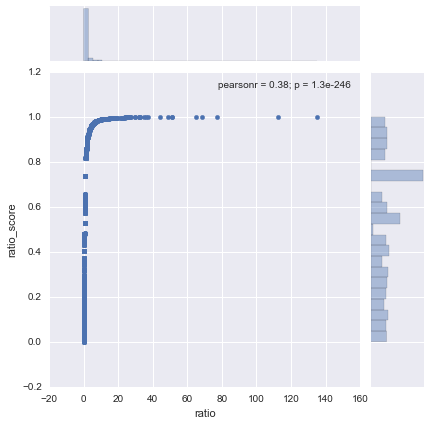


iso count score


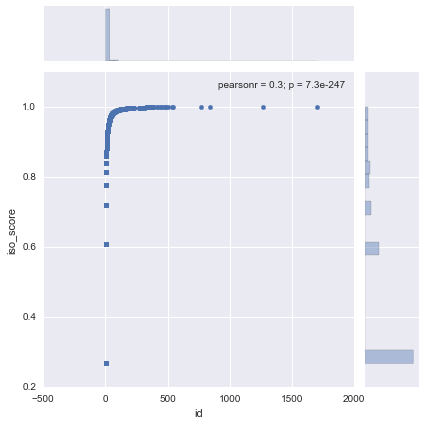


untappd score


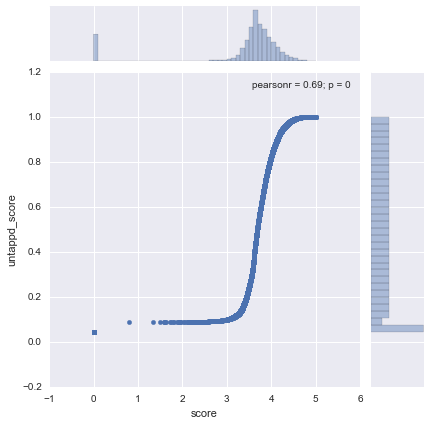


geo score


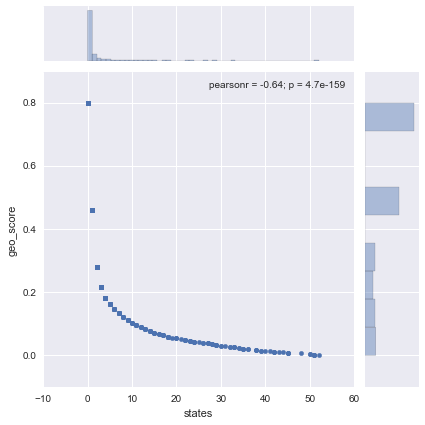


production score


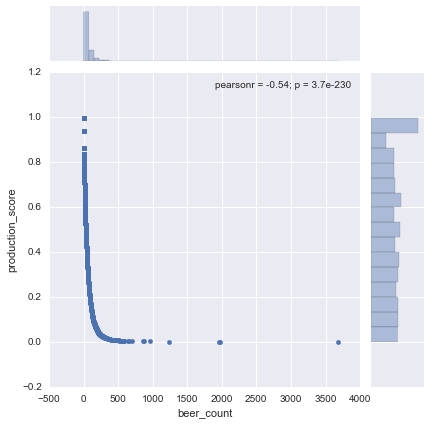

In [79]:
print 'iso/ft ratio score'
sns.jointplot(x='ratio', y='ratio_score', data=ft)
plt.show()
print

print 'iso count score'
sns.jointplot(x='id', y='iso_score', data=iso)
plt.show()
print

print 'untappd score'
sns.jointplot(x='score', y='untappd_score', data=beers)
plt.show()
print 

print 'geo score'
sns.jointplot(x='states', y='geo_score', data=distribution)
plt.show()
print 

print 'production score'
sns.jointplot(x='beer_count', y='production_score', data=breweries)
plt.show()
print 

In [84]:
print 'top 10 using score'
agg_rarity.sort('score', ascending=False).head(10)
print 'tail 10 using score'
agg_rarity.sort('score', ascending=False).tail(10)

top 10 using score
tail 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
27310,Game of Thrones - Three Eyed Raven,867605,249,0.000589,0.001762,0.043594,0.134615,0.095134,0.016787
29676,Old Stock Ale (2015),958334,919,0.002075,0.000587,0.043594,0.038462,0.187416,0.016718
30653,2015 Chai Spiced Imperial Russian Stout,998460,1204,0.000724,0.002936,0.043594,0.211538,0.002013,0.016501
30786,Enjoy After 03.14.16 Brett IPA,1004699,1204,0.002921,0.000587,0.043594,0.211538,0.002013,0.016440
31171,Fyodor's Classic (2014 Stone Imperial Russian ...,1023207,1204,0.000597,0.002349,0.043594,0.211538,0.002013,0.016215
32741,Enjoy After 07.04.16 Brett IPA,1116010,1204,0.000632,0.001762,0.043594,0.211538,0.002013,0.015994
32510,Stone Enjoy By 07.04.15 IPA,1096875,1204,0.000884,0.000587,0.043594,0.211538,0.002013,0.015626
25456,Rogue Farms Chipotle Ale (formerly Rogue Chipo...,790549,4565,0.002427,0.000587,0.135661,0.000000,0.011409,0.015342
7581,Voodoo Doughnut Bacon Maple Ale,81446,4565,0.004588,0.005285,0.095285,0.000000,0.011409,0.014048
12367,"Voodoo Doughnut Chocolate, Peanut Butter & Ban...",260160,4565,0.003947,0.003523,0.103707,0.000000,0.011409,0.013929


### Try mixing scoring

In [86]:
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.feature_scale)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.feature_scale)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)


dropped -27054 na rows
dropped -2461 zero rows
4205 rows remain


In [89]:
print 'top 10 using score'
agg_rarity.sort('score', ascending=False).head(10)

top 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
9330,Kentucky Brunch,131332,7532,0.831474,0.263065,0.986922,0.961538,0.275503,0.598360
12439,Susan,262980,2562,1.000000,0.078685,0.969870,0.980769,0.139430,0.584471
867,Heady Topper,4691,1244,0.021353,1.000000,0.996204,0.961538,0.424329,0.577455
4703,Pliny the Younger,28331,5143,0.506461,0.320611,0.996886,0.826923,0.294966,0.486612
812,Pliny The Elder,4499,5143,0.014212,0.743981,0.992230,0.826923,0.294966,0.458595
4529,Double Sunshine,26308,3758,0.362936,0.287140,0.992467,0.961538,0.201678,0.417438
7187,Mornin' Delight,72430,7532,0.376693,0.208456,0.989057,0.961538,0.275503,0.394817
1243,Canadian Breakfast Stout (CBS),5755,549,0.479978,0.189665,0.995107,0.326923,0.003356,0.383882
7483,Hunahpu’s Imperial Stout - Bourbon Barrel Aged,79177,379,0.570352,0.044627,0.856762,0.865385,0.001007,0.374988
4487,Abner,25843,2562,0.240994,0.247798,0.988760,0.980769,0.139430,0.350403


In [91]:
print 'tail 10 using score'
agg_rarity.sort('score', ascending=False).tail(10)

tail 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
27310,Game of Thrones - Three Eyed Raven,867605,249,0.000589,0.001762,0.043594,0.134615,0.095134,0.016787
29676,Old Stock Ale (2015),958334,919,0.002075,0.000587,0.043594,0.038462,0.187416,0.016718
30653,2015 Chai Spiced Imperial Russian Stout,998460,1204,0.000724,0.002936,0.043594,0.211538,0.002013,0.016501
30786,Enjoy After 03.14.16 Brett IPA,1004699,1204,0.002921,0.000587,0.043594,0.211538,0.002013,0.016440
31171,Fyodor's Classic (2014 Stone Imperial Russian ...,1023207,1204,0.000597,0.002349,0.043594,0.211538,0.002013,0.016215
32741,Enjoy After 07.04.16 Brett IPA,1116010,1204,0.000632,0.001762,0.043594,0.211538,0.002013,0.015994
32510,Stone Enjoy By 07.04.15 IPA,1096875,1204,0.000884,0.000587,0.043594,0.211538,0.002013,0.015626
25456,Rogue Farms Chipotle Ale (formerly Rogue Chipo...,790549,4565,0.002427,0.000587,0.135661,0.000000,0.011409,0.015342
7581,Voodoo Doughnut Bacon Maple Ale,81446,4565,0.004588,0.005285,0.095285,0.000000,0.011409,0.014048
12367,"Voodoo Doughnut Chocolate, Peanut Butter & Ban...",260160,4565,0.003947,0.003523,0.103707,0.000000,0.011409,0.013929


### Mess with weights - ratio heavy
More weight on ratio score, less weight on iso score

In [92]:
SCORE_WEIGHTS = {
    'ratio_score': 0.6, # demand to supply is the 
    'iso_score': 0.2, # 
    'untappd_score': 0.1, # low to represent a sanity check - if a beer sucks this addition will kill it
    'geo_score': 0.05,
    'production_score': 0.05 # blended production and state score
    }

In [93]:
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.feature_scale)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.feature_scale)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)


dropped -27054 na rows
dropped -2461 zero rows
4205 rows remain


In [94]:
print 'top 10 using score'
agg_rarity.sort('score', ascending=False).head(10)

top 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
12439,Susan,262980,2562,1.000000,0.078685,0.969870,0.980769,0.139430,0.768734
9330,Kentucky Brunch,131332,7532,0.831474,0.263065,0.986922,0.961538,0.275503,0.712042
4703,Pliny the Younger,28331,5143,0.506461,0.320611,0.996886,0.826923,0.294966,0.523782
7483,Hunahpu’s Imperial Stout - Bourbon Barrel Aged,79177,379,0.570352,0.044627,0.856762,0.865385,0.001007,0.480133
1243,Canadian Breakfast Stout (CBS),5755,549,0.479978,0.189665,0.995107,0.326923,0.003356,0.441945
4529,Double Sunshine,26308,3758,0.362936,0.287140,0.992467,0.961538,0.201678,0.432597
7187,Mornin' Delight,72430,7532,0.376693,0.208456,0.989057,0.961538,0.275503,0.428465
867,Heady Topper,4691,1244,0.021353,1.000000,0.996204,0.961538,0.424329,0.381725
16182,Mexican Cake (Jack Daniels Barrel Aged),401829,10905,0.377752,0.029360,0.956524,0.865385,0.021812,0.372535
11699,Society & Solitude #5,231394,2562,0.325898,0.051086,0.978618,0.980769,0.139430,0.359628


### ISO heavy

In [95]:
SCORE_WEIGHTS = {
    'ratio_score': 0.2,
    'iso_score': 0.6,
    'untappd_score': 0.1,
    'geo_score': 0.05,
    'production_score': 0.05
    }

In [96]:
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.feature_scale)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.feature_scale)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)


dropped -27054 na rows
dropped -2461 zero rows
4205 rows remain


In [97]:
print 'top 10 using score'
agg_rarity.sort('score', ascending=False).head(10)

top 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
867,Heady Topper,4691,1244,0.021353,1.000000,0.996204,0.961538,0.424329,0.773184
812,Pliny The Elder,4499,5143,0.014212,0.743981,0.992230,0.826923,0.294966,0.604549
9330,Kentucky Brunch,131332,7532,0.831474,0.263065,0.986922,0.961538,0.275503,0.484678
4703,Pliny the Younger,28331,5143,0.506461,0.320611,0.996886,0.826923,0.294966,0.449442
2174,Hunahpu’s Imperial Stout,9060,379,0.025640,0.492073,0.985083,0.865385,0.001007,0.442200
3097,Zombie Dust,13559,2470,0.010692,0.450382,0.986684,0.846154,0.026846,0.414686
4529,Double Sunshine,26308,3758,0.362936,0.287140,0.992467,0.961538,0.201678,0.402279
12439,Susan,262980,2562,1.000000,0.078685,0.969870,0.980769,0.139430,0.400208
7187,Mornin' Delight,72430,7532,0.376693,0.208456,0.989057,0.961538,0.275503,0.361170
4487,Abner,25843,2562,0.240994,0.247798,0.988760,0.980769,0.139430,0.351764


### Balanced iso & iso/ft ratio weights

In [98]:
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.1, # low to represent a sanity check - if a beer sucks this addition will kill it
    'geo_score': 0.05,
    'production_score': 0.05 # blended production and state score
    }
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.feature_scale)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.feature_scale)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)

print 'top 10 using score'
agg_rarity.sort('score', ascending=False).head(10)

dropped -27054 na rows
dropped -2461 zero rows
4205 rows remain
top 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
9330,Kentucky Brunch,131332,7532,0.831474,0.263065,0.986922,0.961538,0.275503,0.598360
12439,Susan,262980,2562,1.000000,0.078685,0.969870,0.980769,0.139430,0.584471
867,Heady Topper,4691,1244,0.021353,1.000000,0.996204,0.961538,0.424329,0.577455
4703,Pliny the Younger,28331,5143,0.506461,0.320611,0.996886,0.826923,0.294966,0.486612
812,Pliny The Elder,4499,5143,0.014212,0.743981,0.992230,0.826923,0.294966,0.458595
4529,Double Sunshine,26308,3758,0.362936,0.287140,0.992467,0.961538,0.201678,0.417438
7187,Mornin' Delight,72430,7532,0.376693,0.208456,0.989057,0.961538,0.275503,0.394817
1243,Canadian Breakfast Stout (CBS),5755,549,0.479978,0.189665,0.995107,0.326923,0.003356,0.383882
7483,Hunahpu’s Imperial Stout - Bourbon Barrel Aged,79177,379,0.570352,0.044627,0.856762,0.865385,0.001007,0.374988
4487,Abner,25843,2562,0.240994,0.247798,0.988760,0.980769,0.139430,0.350403


### Very geography conscious

In [102]:
SCORE_WEIGHTS = {
    'ratio_score': 0.3,
    'iso_score': 0.3,
    'untappd_score': 0,
    'geo_score': 0.2,
    'production_score': 0.2
    }
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.feature_scale)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.feature_scale)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)

print 'top 10 using score'
agg_rarity.sort('score', ascending=False).head(10)

dropped -27054 na rows
dropped -2461 zero rows
4205 rows remain
top 10 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
867,Heady Topper,4691,1244,0.021353,1.000000,0.996204,0.961538,0.424329,0.583579
9330,Kentucky Brunch,131332,7532,0.831474,0.263065,0.986922,0.961538,0.275503,0.575770
12439,Susan,262980,2562,1.000000,0.078685,0.969870,0.980769,0.139430,0.547645
4703,Pliny the Younger,28331,5143,0.506461,0.320611,0.996886,0.826923,0.294966,0.472499
812,Pliny The Elder,4499,5143,0.014212,0.743981,0.992230,0.826923,0.294966,0.451836
4529,Double Sunshine,26308,3758,0.362936,0.287140,0.992467,0.961538,0.201678,0.427666
7187,Mornin' Delight,72430,7532,0.376693,0.208456,0.989057,0.961538,0.275503,0.422953
19699,Egregious,551845,73836,0.274044,0.021139,0.858037,0.961538,0.649832,0.410829
23345,Unblended (Barrel #40),695109,64810,0.259228,0.019965,0.703025,1.000000,0.614597,0.406677
25768,Fruit Stand - Sour Balaton Cherry,804206,127424,0.072183,0.022314,0.526305,1.000000,0.833054,0.394960


### Mark params

In [13]:
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.2,
    'geo_score': 0.0,
    'production_score': 0.0
    }
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.feature_scale)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.feature_scale)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)

print 'top 20 using score'
agg_rarity.sort('score', ascending=False).head(20)

dropped -27054 na rows
dropped -2461 zero rows
4205 rows remain
top 20 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
9330,Kentucky Brunch,131332,7532,0.831474,0.263065,0.986922,0.961538,0.275503,0.635200
12439,Susan,262980,2562,1.000000,0.078685,0.969870,0.980769,0.139430,0.625448
867,Heady Topper,4691,1244,0.021353,1.000000,0.996204,0.961538,0.424329,0.607782
4703,Pliny the Younger,28331,5143,0.506461,0.320611,0.996886,0.826923,0.294966,0.530206
812,Pliny The Elder,4499,5143,0.014212,0.743981,0.992230,0.826923,0.294966,0.501723
1243,Canadian Breakfast Stout (CBS),5755,549,0.479978,0.189665,0.995107,0.326923,0.003356,0.466879
4529,Double Sunshine,26308,3758,0.362936,0.287140,0.992467,0.961538,0.201678,0.458524
7187,Mornin' Delight,72430,7532,0.376693,0.208456,0.989057,0.961538,0.275503,0.431871
7483,Hunahpu’s Imperial Stout - Bourbon Barrel Aged,79177,379,0.570352,0.044627,0.856762,0.865385,0.001007,0.417344
2174,Hunahpu’s Imperial Stout,9060,379,0.025640,0.492073,0.985083,0.865385,0.001007,0.404102


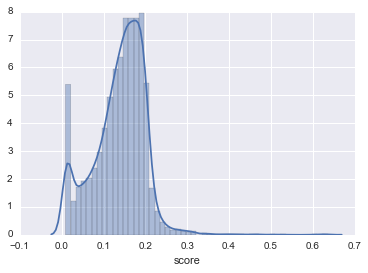

In [14]:
sns.distplot(agg_rarity['score'])

In [24]:
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.2,
    'geo_score': 0.0,
    'production_score': 0.0
    }
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
ft, iso = r.wishlist_scores(FTISO_PATH, r.weighted_percentile)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.weighted_percentile)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)

print 'top 20 using score'
agg_rarity.sort('score', ascending=False).head(30)

rarity_score.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rarity['score'] += rarity[category] * weight
rarity_score.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rarity['score'] = rarity['score'] / sum(score_weights.values())


dropped -27054 na rows
top 20 using score


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
4703,Pliny the Younger,28331,5143,0.999589,0.999662,0.996886,0.112044,0.294966,0.999078
4529,Double Sunshine,26308,3758,0.999042,0.999409,0.992467,0.280657,0.201678,0.997874
1243,Canadian Breakfast Stout (CBS),5755,549,0.999452,0.997550,0.995107,0.020438,0.003356,0.997822
9330,Kentucky Brunch,131332,7532,0.999863,0.999071,0.986922,0.280657,0.275503,0.996958
7187,Mornin' Delight,72430,7532,0.999179,0.998226,0.989057,0.280657,0.275503,0.996773
4487,Abner,25843,2562,0.998357,0.998986,0.988760,0.461314,0.139430,0.996689
12490,Abraxas (Barrel Aged),264563,3533,0.995071,0.998902,0.992764,0.112044,0.033893,0.996142
28383,Canadian Breakfast Stout (CBS) (2014),904797,549,0.997330,0.992522,0.999733,0.020438,0.003356,0.995888
1962,Cable Car Ale,8225,2712,0.997125,0.994128,0.994158,0.799270,0.093121,0.995333
6279,Double Citra,53192,2562,0.998015,0.996451,0.977343,0.461314,0.139430,0.993255


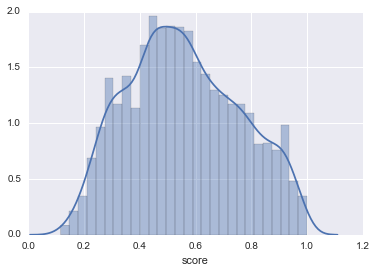

In [12]:
sns.distplot(agg_rarity['score'])

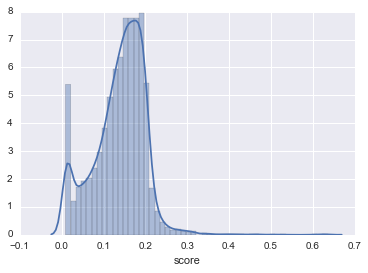

In [15]:
sns.distplot(agg_rarity['score'])

In [16]:
iso[iso['beer_id'] == 9060]

,beer_id,id,quantity,cellar_quantity,user_id,type,accessible_list,created,modified,iso_score
999,9060,839,839,839,839,839,839,839,839,0.492073


In [17]:
ft[ft['beer_id'] == 9060]

,beer_id,id_x,quantity_x,cellar_quantity_x,user_id_x,type_x,accessible_list_x,created_x,modified_x,id_y,quantity_y,cellar_quantity_y,user_id_y,type_y,accessible_list_y,created_y,modified_y,ratio,ratio_score
812,9060,839,839,839,839,839,839,839,839,242,242,242,242,242,242,242,242,3.466942,0.02564


In [20]:
# weighted percentile hunapu
agg_rarity[agg_rarity['beer'] == 9060]

,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
2174,Hunahpu’s Imperial Stout,9060,379,0.942497,0.999831,0.985083,0.132847,0.001007,0.973948


### Drop wishlist zeros

10605 isos dropped (ones)
1079 iso / fts dropped (zeros)
dropped -33630 na rows
iso/ft ratio score


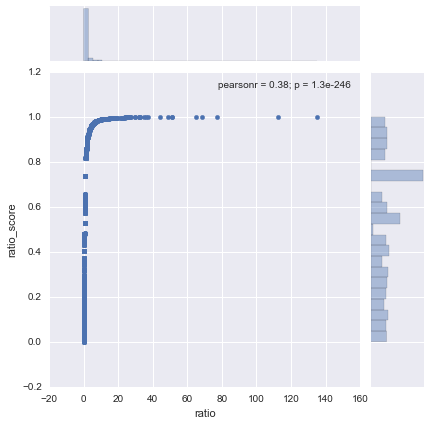


iso count score


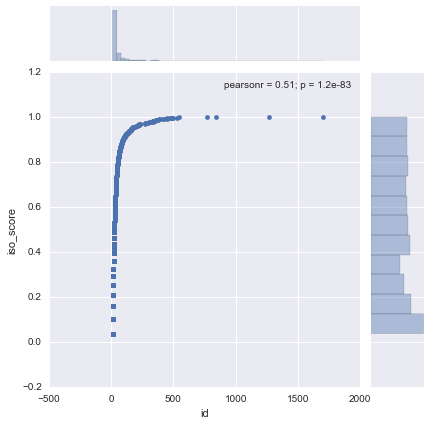

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [48]:
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.2,
    'geo_score': 0.0,
    'production_score': 0.0
    }
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
iso_ft, iso = r.wishlist_scores(FTISO_PATH, r.weighted_percentile)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.weighted_percentile)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (iso_ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)

print 'iso/ft ratio score'
sns.jointplot(x='ratio', y='ratio_score', data=ft)
plt.show()
print

print 'iso count score'
sns.jointplot(x='id', y='iso_score', data=iso)
plt.show()
print

iso_ft.describe()
agg_rarity = agg_rarity.sort('score', ascending=False)

In [50]:
agg_rarity.head(20)

,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
9330,Kentucky Brunch,131332,7532,0.988889,0.991057,0.986922,0.280657,0.275503,0.989363
4703,Pliny the Younger,28331,5143,0.966667,0.996748,0.996886,0.112044,0.294966,0.984743
1243,Canadian Breakfast Stout (CBS),5755,549,0.955556,0.976423,0.995107,0.020438,0.003356,0.971813
12439,Susan,262980,2562,1.000000,0.928049,0.969870,0.461314,0.139430,0.965193
4529,Double Sunshine,26308,3758,0.922222,0.994309,0.992467,0.280657,0.201678,0.965106
7187,Mornin' Delight,72430,7532,0.933333,0.982927,0.989057,0.280657,0.275503,0.964315
4487,Abner,25843,2562,0.866667,0.990244,0.988760,0.461314,0.139430,0.940516
6279,Double Citra,53192,2562,0.838889,0.965854,0.977343,0.461314,0.139430,0.917366
11699,Society & Solitude #5,231394,2562,0.911111,0.890650,0.978618,0.461314,0.139430,0.916428
7483,Hunahpu’s Imperial Stout - Bourbon Barrel Aged,79177,379,0.977778,0.869512,0.856762,0.132847,0.001007,0.910268


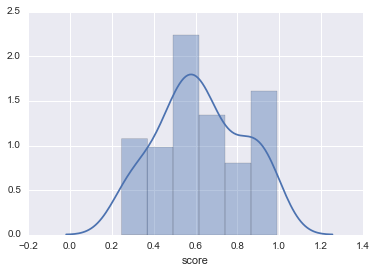

In [51]:
sns.distplot(agg_rarity.score)
plt.show()

In [52]:
len(agg_rarity)

90

In [53]:
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.2,
    'geo_score': 0.0,
    'production_score': 0.0
    }
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
iso_ft, iso = r.wishlist_scores(FTISO_PATH, r.weighted_percentile)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.weighted_percentile)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (iso_ft[['beer_id', 'ratio_score']], 'beer'),
    (iso[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=True)

len(agg_rarity)

rarity_score.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return rarity
rarity_score.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dropped -27054 na rows


6666

In [49]:
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.2,
    'geo_score': 0.0,
    'production_score': 0.0
    }
beers = pd.read_csv(BEERS_PATH)
# initialize output dataframe
rarity = beers[['name', 'id', 'brewery_id']]
# fix column names to prevent redundancies during the merges
rarity.columns = ['name', 'beer', 'brewery']
# get all scores based on inputted method (feature scale or percentile)
iso_ft = r.wishlist_scores(FTISO_PATH, r.weighted_percentile)
distribution = r.distribution_scores(DISTRIBUTION_PATH, r.weighted_percentile)
breweries = r.production_scores(BREWERIES_PATH, r.weighted_percentile)
beers = r.untappd_scores(BEERS_PATH, r.weighted_percentile)
# merge all dfs
beer_scores = [
    (iso_ft[['beer_id', 'ratio_score']], 'beer'),
    (iso_ft[['beer_id', 'iso_score']], 'beer'),
    (beers[['id', 'untappd_score']], 'beer'),
    (distribution[['brewery_id', 'geo_score']], 'brewery'),
    (breweries[['id', 'production_score']], 'brewery')
    ]
for df, rarity_idx in beer_scores:
    rarity = rarity.merge(df, how='left', left_on=rarity_idx,
        right_on=df.columns[0]).drop(df.columns[0], axis=1)
agg_rarity = r.agg_weighted_score(rarity, SCORE_WEIGHTS, drop_nas=False)

len(agg_rarity)

33720

iso/ft ratio score


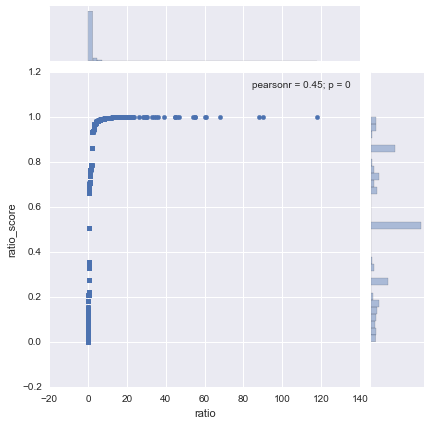


iso count score


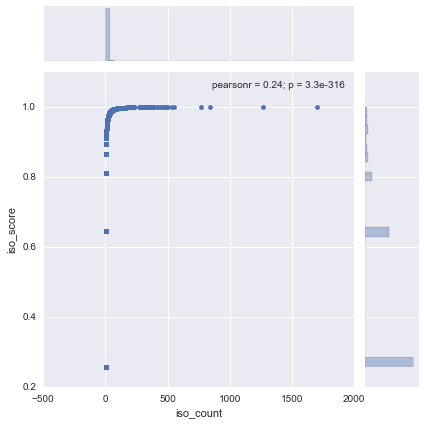

In [51]:
print 'iso/ft ratio score'
sns.jointplot(x='ratio', y='ratio_score', data=iso_ft)
plt.show()
print

print 'iso count score'
sns.jointplot(x='iso_count', y='iso_score', data=iso_ft)
plt.show()
print

In [53]:
agg_rarity.head(20)

,name,beer,brewery,ratio_score,iso_score,untappd_score,geo_score,production_score,score
0,Hocus Pocus,1,812,0.700250,0.810435,0.118357,0.014964,0.332886,0.627945
1,Grimbergen Blonde,2,264,0.507226,0.257768,0.212811,NaN,0.286913,NaN
2,Oatmeal Stout,8,1099,0.065317,0.810435,0.680605,0.799270,0.294966,0.486422
3,Chocolate Stout,10,545,0.663897,0.864208,0.163138,0.050000,0.226846,0.643869
4,Imperial Stout,14,1099,0.057866,0.257768,0.623488,0.799270,0.294966,0.250951
5,Winter Ale,26,2396,0.274389,0.257768,0.222702,0.071898,0.416611,0.257403
6,IPA,28,7296,0.222213,0.971609,0.771293,0.097445,0.005369,0.631788
7,Cutthroat Porter,30,7296,0.143427,0.810435,0.544425,0.097445,0.005369,0.490430
8,Maple Nut Brown Ale,31,4378,0.683977,0.644696,0.214250,0.024818,0.310570,0.574319
9,Cocoa Porter,32,4378,0.507226,0.257768,0.216192,0.024818,0.310570,0.349236


### Add in laplace smoothing for wishlist scores = 0

rarity_score.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """returns a dataframe with scores from 0-1 based on iso count, ft/iso,
rarity_score.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  distribution, production, and untappd ratings


dropped -9293 na rows
iso/ft ratio score


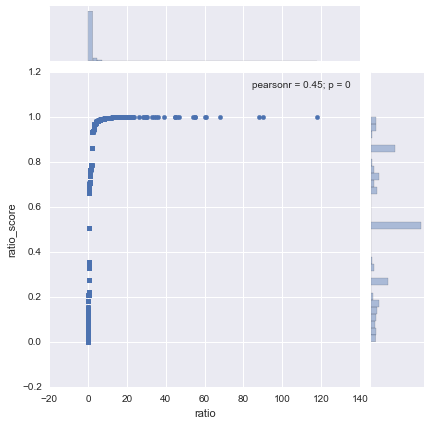


iso count score


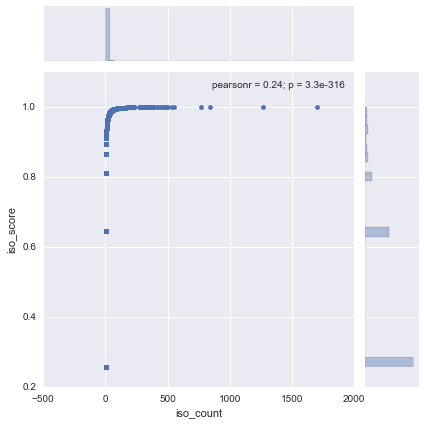

,iso_count,beer_id,ft_count,ratio,ratio_score,iso_score
count,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000
mean,4.424285,456305.388300,7.867933,1.015186,0.500020,0.500020
std,23.881838,366153.157726,25.099912,2.202062,0.283920,0.265418
min,1.000000,1.000000,1.000000,0.009174,0.000041,0.257768
25%,1.000000,88729.000000,2.000000,0.333333,0.274389,0.257768
50%,1.000000,409376.000000,2.000000,0.500000,0.507226,0.257768
75%,2.000000,781263.500000,5.000000,1.000000,0.735129,0.644696
max,1705.000000,1335391.000000,891.000000,118.000000,1.000000,1.000000


In [43]:
# without preserving zeros
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.2,
    'geo_score': 0.0,
    'production_score': 0.0
    }
agg_rarity = r.main()
print 'iso/ft ratio score'
sns.jointplot(x='ratio', y='ratio_score', data=iso_ft)
plt.show()
print

print 'iso count score'
sns.jointplot(x='iso_count', y='iso_score', data=iso_ft)
plt.show()
print

agg_score.describe()

iso/ft ratio score


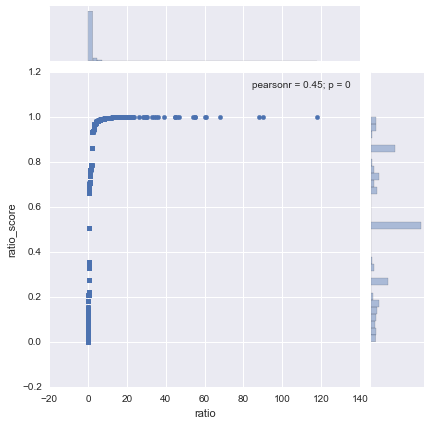


iso count score


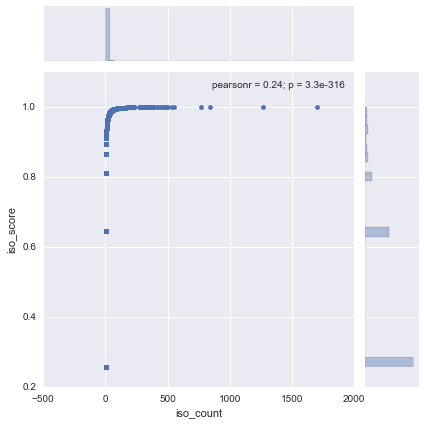

,iso_count,beer_id,ft_count,ratio,ratio_score,iso_score
count,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000
mean,4.424285,456305.388300,7.867933,1.015186,0.500020,0.500020
std,23.881838,366153.157726,25.099912,2.202062,0.283920,0.265418
min,1.000000,1.000000,1.000000,0.009174,0.000041,0.257768
25%,1.000000,88729.000000,2.000000,0.333333,0.274389,0.257768
50%,1.000000,409376.000000,2.000000,0.500000,0.507226,0.257768
75%,2.000000,781263.500000,5.000000,1.000000,0.735129,0.644696
max,1705.000000,1335391.000000,891.000000,118.000000,1.000000,1.000000


In [52]:
# with preserving zeros
print 'iso/ft ratio score'
sns.jointplot(x='ratio', y='ratio_score', data=iso_ft)
plt.show()
print

print 'iso count score'
sns.jointplot(x='iso_count', y='iso_score', data=iso_ft)
plt.show()
print

iso_ft.describe()

In [54]:
agg_rarity = agg_rarity.sort('score', ascending=False)
agg_rarity.head() 

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,beer,brewery,ratio_score,iso_score,untappd_score,score
33716,Angel of Darkness,1320328,37851,1.000000,1.000000,0.984935,0.998326
10645,Oude Geuze (2008),184740,3562,0.884226,0.988128,0.991103,0.942280
10765,Bourbon Fred From The Wood (2012),189119,622,0.882589,0.991894,0.980872,0.942089
10776,Supplication (Batch 007),189655,5143,0.882753,0.990052,0.985973,0.941910
10669,Consecration (Batch 008),185729,5143,0.883899,0.988455,0.985202,0.941624


In [61]:
iso_ft[iso_ft['beer_id'] == 1320328]

,iso_count,beer_id,ft_count,ratio,ratio_score,iso_score
24426,1,1320328,2,0.5,0.507226,0.257768


### Debugging

dropped -9293 na rows
iso/ft ratio score


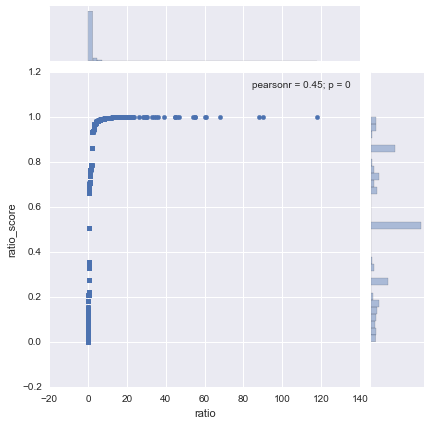


iso count score


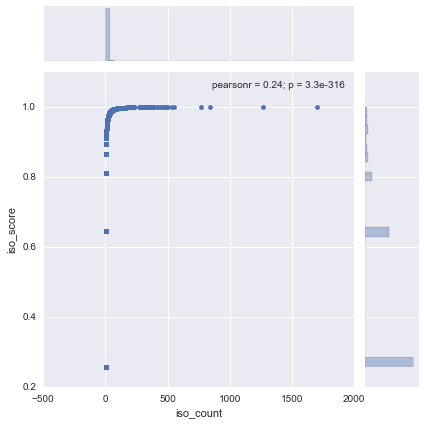

,beer,brewery,ratio_score,iso_score,untappd_score,score
count,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000
mean,456305.388300,16652.947067,0.500020,0.500020,0.528366,0.503170
std,366153.157726,30910.514393,0.283920,0.265418,0.284161,0.215254
min,1.000000,1.000000,0.000041,0.257768,0.043594,0.119990
25%,88729.000000,1150.000000,0.274389,0.257768,0.280027,0.344841
50%,409376.000000,3206.000000,0.507226,0.257768,0.545166,0.428155
75%,781263.500000,15721.500000,0.735129,0.644696,0.774718,0.701290
max,1335391.000000,240230.000000,1.000000,1.000000,0.999881,0.999508


In [65]:
# without preserving zeros
SCORE_WEIGHTS = {
    'ratio_score': 0.4,
    'iso_score': 0.4,
    'untappd_score': 0.2,
    'geo_score': 0.0,
    'production_score': 0.0
    }
agg_rarity, iso_ft, distribution, breweries, beers = r.main()
print 'iso/ft ratio score'
sns.jointplot(x='ratio', y='ratio_score', data=iso_ft)
plt.show()
print

print 'iso count score'
sns.jointplot(x='iso_count', y='iso_score', data=iso_ft)
plt.show()
print

agg_rarity.describe()

In [71]:
iso_ft.describe()

,iso_count,beer_id,ft_count,ratio,ratio_score,iso_score
count,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000
mean,4.424285,456305.388300,7.867933,1.015186,0.500020,0.500020
std,23.881838,366153.157726,25.099912,2.202062,0.283920,0.265418
min,1.000000,1.000000,1.000000,0.009174,0.000041,0.257768
25%,1.000000,88729.000000,2.000000,0.333333,0.274389,0.257768
50%,1.000000,409376.000000,2.000000,0.500000,0.507226,0.257768
75%,2.000000,781263.500000,5.000000,1.000000,0.735129,0.644696
max,1705.000000,1335391.000000,891.000000,118.000000,1.000000,1.000000


### Final iteration

In [74]:
agg_rarity.head(50)

,name,beer,brewery,ratio_score,iso_score,untappd_score,score
4703,Pliny the Younger,28331,5143,0.999836,0.999836,0.996886,0.999508
4529,Double Sunshine,26308,3758,0.999550,0.999713,0.992467,0.998836
1243,Canadian Breakfast Stout (CBS),5755,549,0.999672,0.998813,0.995107,0.998783
9330,Kentucky Brunch,131332,7532,0.999959,0.999550,0.986922,0.998329
12490,Abraxas (Barrel Aged),264563,3533,0.998444,0.999468,0.992764,0.998268
4487,Abner,25843,2562,0.999263,0.999509,0.988760,0.998205
7187,Mornin' Delight,72430,7532,0.999509,0.999140,0.989057,0.998184
28383,Canadian Breakfast Stout (CBS) (2014),904797,549,0.998854,0.996377,0.999733,0.997851
1962,Cable Car Ale,8225,2712,0.998813,0.997155,0.994158,0.997559
2609,Rare Bourbon County Brand Stout (2010),11024,2898,0.993573,0.998403,0.999021,0.996325


In [75]:
agg_rarity.tail(50)

,name,beer,brewery,ratio_score,iso_score,untappd_score,score
18951,Boiler Room Berliner Weisse,519439,2940,0.014820,0.257768,0.178381,0.140970
622,Black & Tan,3815,1976,0.022332,0.257768,0.144573,0.140553
29811,Bourbon Barleywine (2015),962700,16167,0.047140,0.257768,0.043594,0.140359
31008,Cherry Spazz,1014023,135321,0.047140,0.257768,0.043594,0.140359
32563,Hogarth,1102853,20827,0.047140,0.257768,0.043594,0.140359
27931,Blanche,888486,1467,0.047140,0.257768,0.043594,0.140359
4953,DreamWeaver Wheat,31284,2583,0.004790,0.257768,0.212070,0.140256
2227,Torch Pilsner,9331,543,0.022332,0.257768,0.139205,0.139956
997,Pale Ale (Yellowtail),5132,68,0.019016,0.257768,0.140451,0.138621
5650,Firefly Amber,42630,5083,0.009313,0.257768,0.173606,0.137992


In [92]:
a = iso_ft.sort('ratio', ascending=False).head(50)
a.merge(beers[['id', 'name']], left_on='beer_id', right_on='id', how='left')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,iso_count,beer_id,ft_count,ratio,ratio_score,iso_score,id,name
0,118,34271,1,118.000000,1.000000,0.995927,34271,Ephraim
1,450,131332,5,90.000000,0.999959,0.999550,131332,Kentucky Brunch
2,88,42944,1,88.000000,0.999918,0.994371,42944,Double Galaxy
3,136,262980,2,68.000000,0.999877,0.996377,262980,Susan
4,548,28331,9,60.888889,0.999836,0.999836,28331,Pliny the Younger
5,60,79370,1,60.000000,0.999795,0.991055,79370,Hunahpu’s Imperial Stout - Rum Barrel Aged
6,55,318174,1,55.000000,0.999734,0.990257,318174,Double Sunshine (Double Dry-Hopped )
7,55,345484,1,55.000000,0.999734,0.990257,345484,Assassin 2013 (Yellow Wax)
8,325,5755,6,54.166667,0.999672,0.998813,5755,Canadian Breakfast Stout (CBS)
9,47,4682,1,47.000000,0.999632,0.988189,4682,Kate the Great


In [93]:
a = iso_ft.sort('iso_count', ascending=False).head(50)
a.merge(beers[['id', 'name']], left_on='beer_id', right_on='id', how='left')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,iso_count,beer_id,ft_count,ratio,ratio_score,iso_score,id,name
0,1705,4691,591,2.884941,0.938633,1.000000,4691,Heady Topper
1,1269,4499,660,1.922727,0.786179,0.999959,4499,Pliny The Elder
2,840,9060,243,3.456790,0.966144,0.999918,9060,Hunahpu’s Imperial Stout
3,769,13559,531,1.448211,0.769845,0.999877,13559,Zombie Dust
4,548,28331,9,60.888889,0.999836,0.999836,28331,Pliny the Younger
5,533,113889,321,1.660436,0.782167,0.999795,113889,Mexican Cake
6,501,489624,50,10.020000,0.994965,0.999754,489624,Double Barrel Hunahpu's
7,491,26308,11,44.636364,0.999550,0.999713,26308,Double Sunshine
8,484,636664,298,1.624161,0.781799,0.999672,636664,Sip of Sunshine
9,474,776678,325,1.458462,0.769968,0.999632,776678,Bourbon County Brand Stout Vanilla Rye (2014)


In [95]:
beers.sort('score', ascending=False).head(50)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,name,style,description,abv,label,score,brewery_id,brewery_name,created,modified,untappd_score
27928,888232,Black Perle 2013,Black IPA / Cascadian Dark Ale,NaN,9.0,https://d1c8v1qci5en44.cloudfront.net/site/ass...,5.00000,1669,RJ Rockers Brewing Company,2014-12-06 23:59:41,2014-12-06 23:59:41,0.999881
23862,718299,Pliny The Younger...er,Imperial / Double IPA,"Hop explosion, this is a reimagined Pliny the ...",10.0,https://d1c8v1qci5en44.cloudfront.net/site/ass...,5.00000,125388,Summerland Ale Works,2014-12-18 03:38:58,2014-12-18 03:38:58,0.999881
10417,175011,Neal Dow IPA (2011),American IPA,"Northwest Style India Pale Ale , Aggressively ...",4.9,https://d1c8v1qci5en44.cloudfront.net/site/bee...,5.00000,30761,Alberta Brewing Company,2014-12-19 06:04:28,2014-12-19 06:04:28,0.999881
23630,708043,Helena,Other,NaN,6.1,https://d1c8v1qci5en44.cloudfront.net/site/bee...,5.00000,24,Allagash Brewing Company,2014-12-07 18:53:08,2014-12-07 18:53:08,0.999881
32665,1109994,Kentucky Brunch (Silver Wax) (2013),American Imperial / Double Stout,NaN,12.0,https://d1c8v1qci5en44.cloudfront.net/site/bee...,5.00000,7532,Toppling Goliath Brewing,2015-06-04 13:41:40,2015-06-04 13:41:40,0.999881
10723,187512,Dark Lord ICE,Russian Imperial Stout,The strength was accomplished by taking a 2012...,33.3,https://d1c8v1qci5en44.cloudfront.net/site/ass...,5.00000,32551,FFF (Frosty Fractional Freezing),2014-12-17 05:08:24,2014-12-17 05:08:24,0.999881
30934,1010269,Double Barrel Hunahpu's (2015),American Imperial / Double Stout,NaN,11.5,https://d1c8v1qci5en44.cloudfront.net/site/ass...,5.00000,379,Cigar City Brewing,2015-03-15 16:10:07,2015-03-15 16:10:07,0.999881
13146,288118,Double Barrel Coffee Porter,Porter,NaN,6.5,https://d1c8v1qci5en44.cloudfront.net/site/ass...,5.00000,12658,Flying Pint,2014-12-08 19:06:06,2014-12-08 19:06:06,0.999881
28064,893405,Drinking Beer Bitch...Period!,Braggot,"I drink beer...don't care if it is rare, barre...",100.0,https://d1c8v1qci5en44.cloudfront.net/site/ass...,5.00000,171214,Beer Trades Are For Assholes,2014-12-07 01:35:16,2014-12-07 01:35:16,0.999881
28383,904797,Canadian Breakfast Stout (CBS) (2014),American Imperial / Double Stout,Stout with Chocolate and Coffee aged in Maple ...,10.6,https://d1c8v1qci5en44.cloudfront.net/site/ass...,4.96154,549,Founders Brewing Co.,2014-12-09 19:59:08,2014-12-09 19:59:08,0.999733
